In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Dataset
data = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\CSV FILES\TwitterHate.csv")
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [4]:
#Splitting the data into train and test sets 
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

In [5]:
# checking out the non hate comments from the train set
training_data[training_data['label'] == 0].head(10)

,id,label,tweet
27350,27351,0,having a great time #afternoontea @user #foodi...
6905,6906,0,"sorry practicum, but got is more appealing."
2334,2335,0,i finally found a way how to delete old tweets...
25739,25740,0,think i should #draw a @user next time! @use...
3956,3957,0,meetings with the big boss do not come any bet...
18071,18072,0,yes! â¤ï¸ i love how @user speaks about #emp...
23922,23923,0,#fathersday to my #hubby #dad #dadlife #pare...
8058,8059,0,#model i love u take with u all the time in ...
31773,31774,0,this reminds me of this. i am love these two...
22987,22988,0,very excited for the new album from @user #tas...


In [6]:
# checking out the hate comments from the train set
training_data[training_data['label'] == 1].head(10)

,id,label,tweet
6045,6046,1,the countdown till these assholes are gone ob...
11093,11094,1,@user #allahsoil to say that all muslims hate ...
30189,30190,1,"@user leave a 'gweh' below â¬ if in 2017, you..."
14080,14081,1,ð¨#whitegenocide #bigot telling white stude...
24352,24353,1,@user stop trying to find where it isn't even...
31343,31344,1,malia shake that ass! you so fine!.....pass th...
2898,2899,1,@user @user the correct way it should have bee...
780,781,1,@user thank you!! the power of #social #media!...
6074,6075,1,@user never be content to sit back and watch a...
10627,10628,1,@user my #santaproject is to not shop at @user...


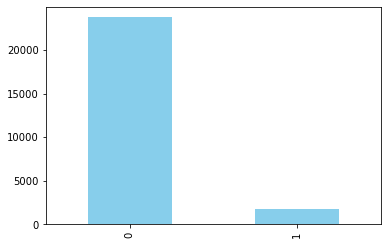

In [7]:
training_data['label'].value_counts().plot.bar(color = 'skyblue', figsize = (6, 4))

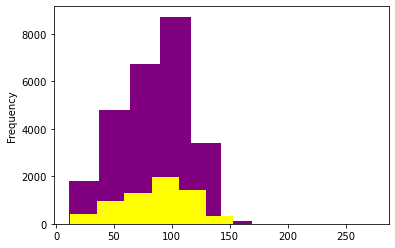

In [8]:
# checking out the distribution of tweets in the data
length_train = training_data['tweet'].str.len().plot.hist(color = 'purple', figsize = (6, 4))
length_test = testing_data['tweet'].str.len().plot.hist(color = 'yellow', figsize = (6, 4))

In [9]:
# A column to represent the length of the tweet
training_data['len'] = training_data['tweet'].str.len()
testing_data['len'] = testing_data['tweet'].str.len()
training_data.head(10)

,id,label,tweet,len
27350,27351,0,having a great time #afternoontea @user #foodi...,104
6905,6906,0,"sorry practicum, but got is more appealing.",45
2334,2335,0,i finally found a way how to delete old tweets...,98
25739,25740,0,think i should #draw a @user next time! @use...,69
3956,3957,0,meetings with the big boss do not come any bet...,98
18071,18072,0,yes! â¤ï¸ i love how @user speaks about #emp...,100
23922,23923,0,#fathersday to my #hubby #dad #dadlife #pare...,86
8058,8059,0,#model i love u take with u all the time in ...,86
31773,31774,0,this reminds me of this. i am love these two...,85
22987,22988,0,very excited for the new album from @user #tas...,63


In [10]:
training_data.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      23756.0  16033.770963  9222.191511   1.0  8047.25  16127.5  24034.25   
1       1814.0  16052.459757  9183.587637  14.0  8108.50  16010.5  23866.25   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  23756.0  84.252694  29.544336  11.0  62.0  88.0  107.0  274.0  
1      31961.0   1814.0  90.229327  27.501618  12.0  69.0  96.0  111.0  143.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

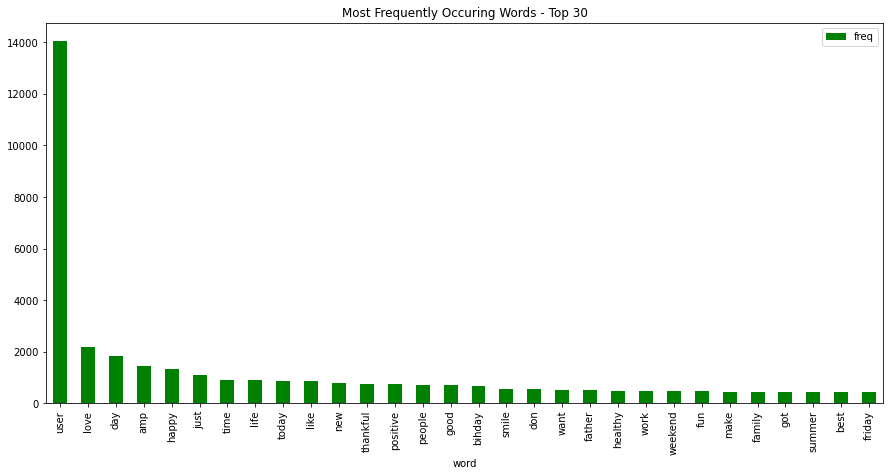

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(training_data.tweet)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'green')
plt.title("Most Frequently Occuring Words - Top 30")

In [12]:
#combining train and test set
X = training_data.append(testing_data, ignore_index=True)

In [13]:
#removing unwanted text patterns from the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [16]:
# remove twitter handles (@user)
import re
X['tidy_tweet'] = np.vectorize(remove_pattern)(X['tweet'], "@[\w]*")

In [18]:
# removing special characters like numbers, punctuations
X['tidy_tweet'] = X['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [19]:
#Removing Short Words
X['tidy_tweet'] = X['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [20]:
X.head()

,id,label,tweet,len,tidy_tweet
0,27351,0,having a great time #afternoontea @user #foodi...,104,having great time #afternoontea #foodie #londo...
1,6906,0,"sorry practicum, but got is more appealing.",45,sorry practicum more appealing
2,2335,0,i finally found a way how to delete old tweets...,98,finally found delete tweets might find useful ...
3,25740,0,think i should #draw a @user next time! @use...,69,think should #draw next time saturday
4,3957,0,meetings with the big boss do not come any bet...,98,meetings with boss come better than that #gree...


In [21]:
tokenized_tweet = X['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [having, great, time, #afternoontea, #foodie, ...
1                  [sorry, practicum, more, appealing]
2    [finally, found, delete, tweets, might, find, ...
3         [think, should, #draw, next, time, saturday]
4    [meetings, with, boss, come, better, than, tha...
Name: tidy_tweet, dtype: object

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [have, great, time, #afternoontea, #foodi, #lo...
1                     [sorri, practicum, more, appeal]
2    [final, found, delet, tweet, might, find, use,...
3         [think, should, #draw, next, time, saturday]
4    [meet, with, boss, come, better, than, that, #...
Name: tidy_tweet, dtype: object

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
X['tidy_tweet'] = tokenized_tweet

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

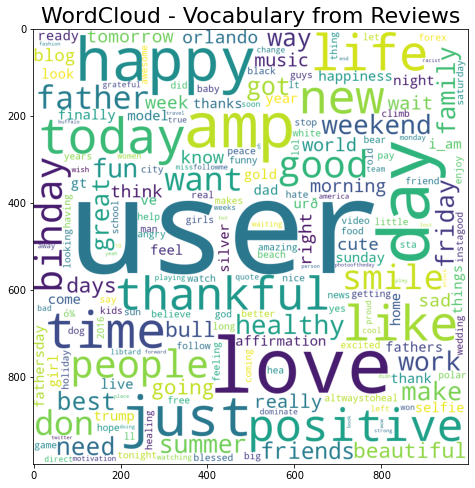

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

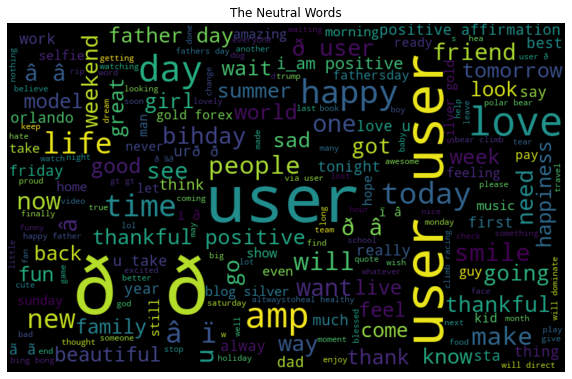

In [26]:
normal_words =' '.join([text for text in X['tweet'][X['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

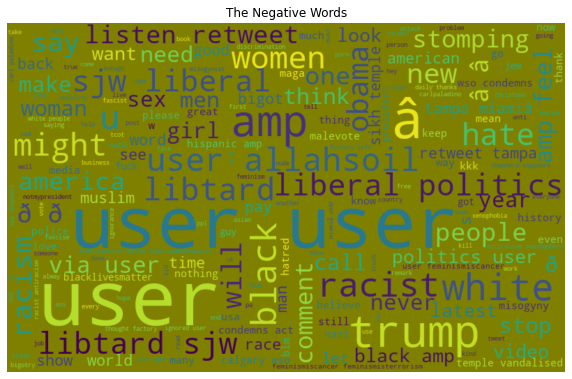

In [27]:
negative_words =' '.join([text for text in X['tweet'][X['label'] == 1]])
wordcloud = WordCloud(background_color = 'Olive', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [28]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []   
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [30]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(training_data['tweet'][X['label'] == 0])
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(training_data['tweet'][X['label'] == 1])
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

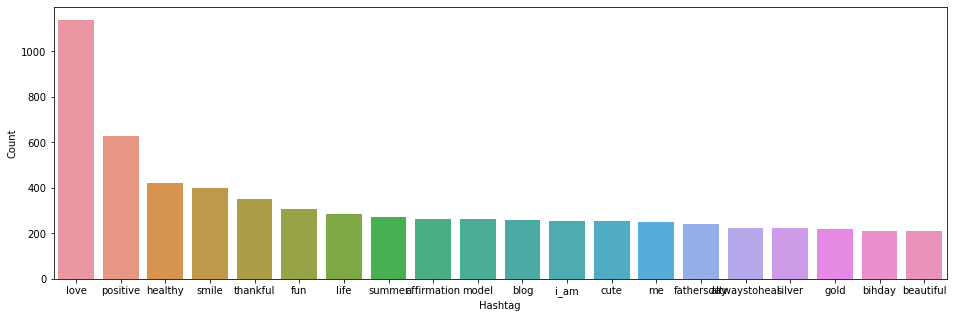

In [31]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

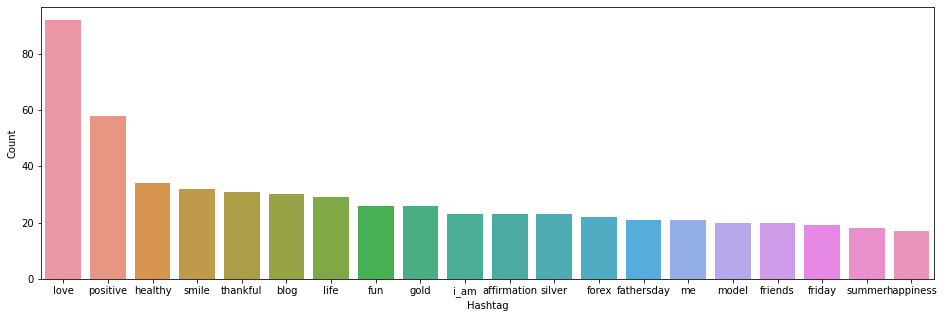

In [32]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [34]:
# importing gensim
import gensim
# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)
model_w2v.train(tokenized_tweet, total_examples= len(X['tweet']), epochs=20)

(5845719, 32817200)

In [36]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [37]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
# label all the tweets
labeled_tweets = add_label(tokenized_tweet)
labeled_tweets[:6]

[LabeledSentence(words='have great time #afternoontea #foodi #london #summersixteentour #bblogger #lifestyl #bu', tags=['tweet_0']),
 LabeledSentence(words='sorri practicum more appeal', tags=['tweet_1']),
 LabeledSentence(words='final found delet tweet might find use well #deletetweet', tags=['tweet_2']),
 LabeledSentence(words='think should #draw next time saturday', tags=['tweet_3']),
 LabeledSentence(words='meet with boss come better than that #greenek #oei #smashedit', tags=['tweet_4']),
 LabeledSentence(words='love speak about #employeesfirst everybodi #healthi', tags=['tweet_5'])]

In [42]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', X['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [45]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', X['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [46]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = X.iloc[:, 1]
print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()
print(x_test.shape)

(17197, 2500)


In [49]:
# splitting the training data into train and valid sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [50]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [51]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9990822243544283
Validation Accuracy : 0.9533224877987736
F1 score : 0.6142709410548086
[[7321  106]
 [ 267  297]]


In [52]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9872762921863919
Validation Accuracy : 0.9381804530096358
f1 score : 0.5734024179620034
[[7165  262]
 [ 232  332]]


In [53]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.999123941429227
Validation Accuracy : 0.9363033412589162
f1 score : 0.5376930063578566
[[7186  241]
 [ 268  296]]
